In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import birdsonganalysis as bsa
from scipy.io import wavfile

In [28]:
sr, tutor = wavfile.read('../data/ba_example.wav')
sr, synth = wavfile.read('../data/ba_example_out.wav')

In [3]:
sim = bsa.similarity(synth, tutor, samplerate=sr, threshold=0.05)

In [4]:
sim['similarity']

0.63505625879043615

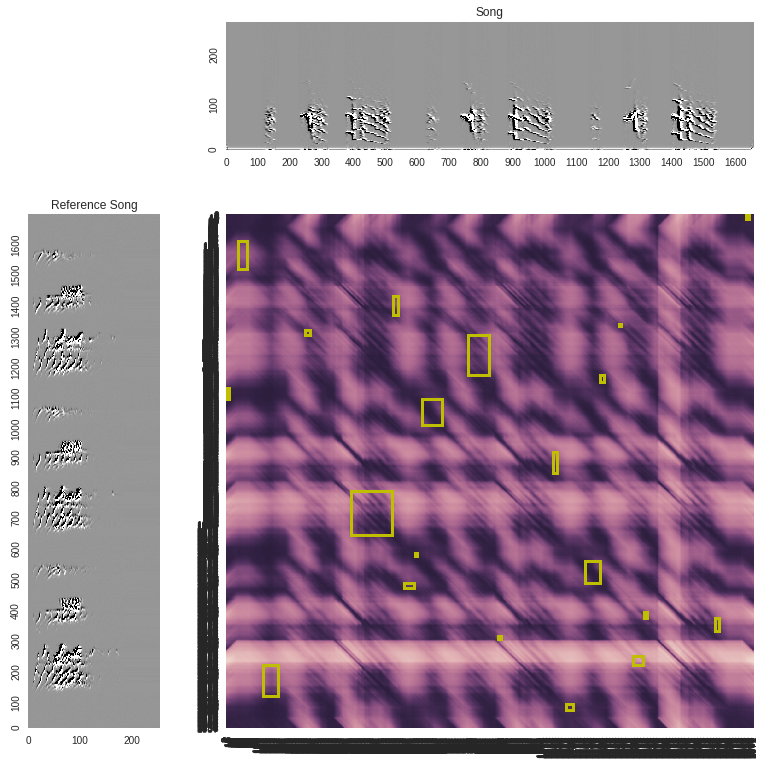

In [5]:
fig = bsa.similarity_plot(sim, synth, tutor)
plt.show(fig)

In [6]:
sdt = bsa.spectral_derivs(tutor)
sds = bsa.spectral_derivs(synth)

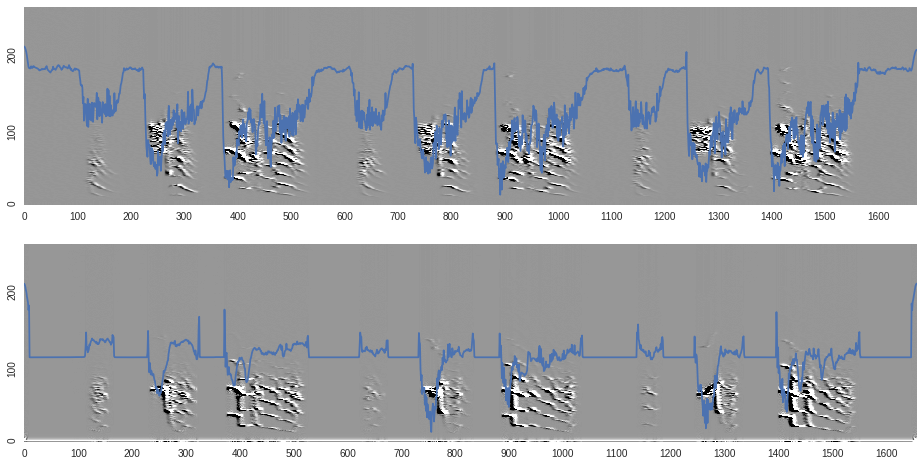

In [7]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8))
ax1 = bsa.spectral_derivs_plot(sdt, ax=ax1)
bsa.plot_over_spec(bsa.song_wiener_entropy(tutor), ax1)

ax2 = bsa.spectral_derivs_plot(sds, ax=ax2)
bsa.plot_over_spec(bsa.song_wiener_entropy(synth), ax2)
plt.show(fig)

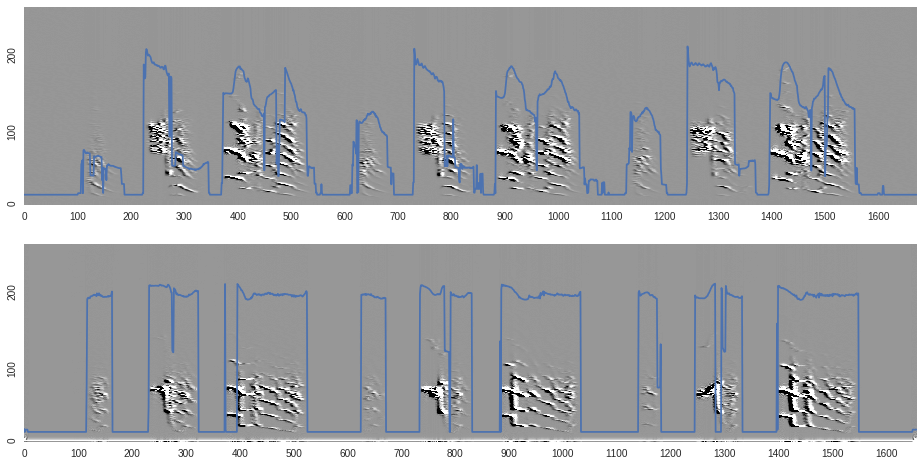

In [31]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8))
ax1 = bsa.spectral_derivs_plot(sdt, ax=ax1)
bsa.plot_over_spec(bsa.song_pitch(tutor, sr, 0.8), ax1)

pitch = bsa.song_pitch(synth, sr, 0.8)
pitch[pitch > np.percentile(pitch, 95)] = 0
pitch[bsa.song_amplitude(synth) < 60] = 0
ax2 = bsa.spectral_derivs_plot(sds, ax=ax2)
bsa.plot_over_spec(pitch, ax2)
plt.show(fig)

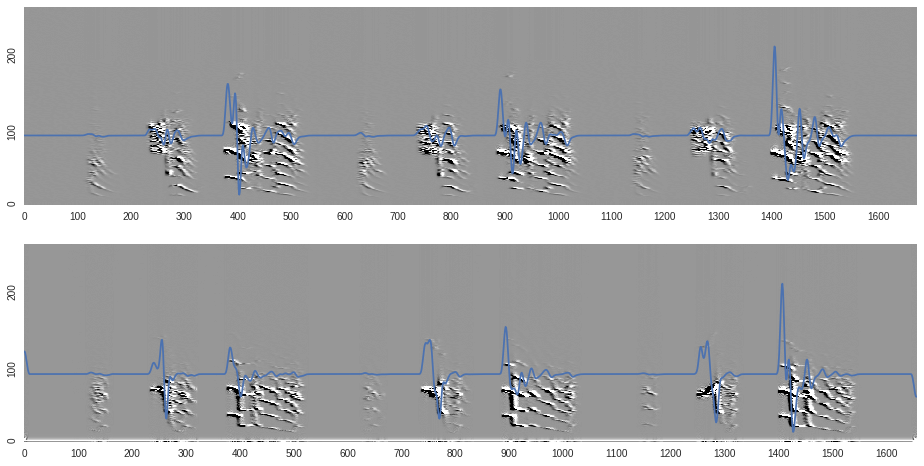

In [9]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8))
ax1 = bsa.spectral_derivs_plot(sdt, ax=ax1)
bsa.plot_over_spec(bsa.song_amplitude_modulation(tutor), ax1)

ax2 = bsa.spectral_derivs_plot(sds, ax=ax2)
bsa.plot_over_spec(bsa.song_amplitude_modulation(synth), ax2)
plt.show(fig)

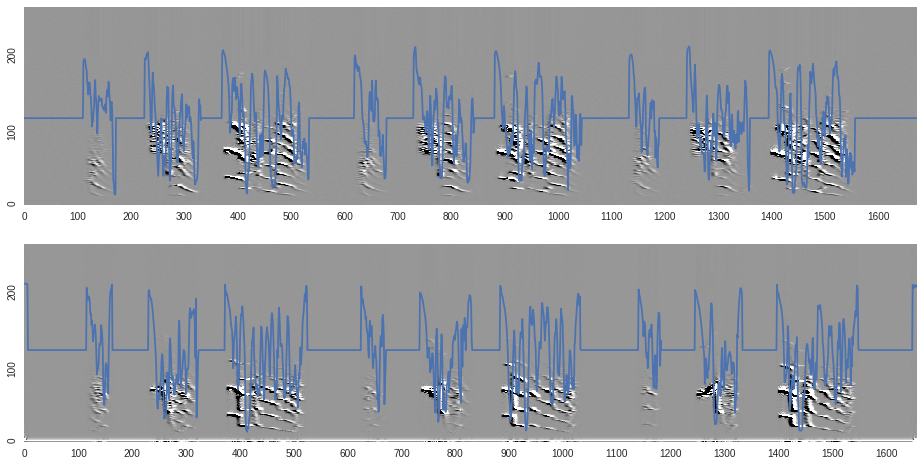

In [10]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8))
ax1 = bsa.spectral_derivs_plot(sdt, ax=ax1)
fm = bsa.song_frequency_modulation(tutor)
fm[bsa.song_amplitude(tutor) < 60] = np.median(fm[bsa.song_amplitude(tutor) > 60])
bsa.plot_over_spec(fm, ax1)

ax2 = bsa.spectral_derivs_plot(sds, ax=ax2)
fm = bsa.song_frequency_modulation(synth)
fm[bsa.song_amplitude(synth) < 60] = np.median(fm[bsa.song_amplitude(synth) > 60])
bsa.plot_over_spec(fm, ax2)
plt.show(fig)

# Let see for one syllable

In [11]:
sr, tutor = wavfile.read('../data/ba_syllable_a.wav')
sr, synth = wavfile.read('../data/ba_syllable_a_out.wav')

In [24]:
tfeat = bsa.all_song_features(tutor, sr, pitch_threshold=0.6)
sfeat = bsa.all_song_features(synth, sr, pitch_threshold=0.6)

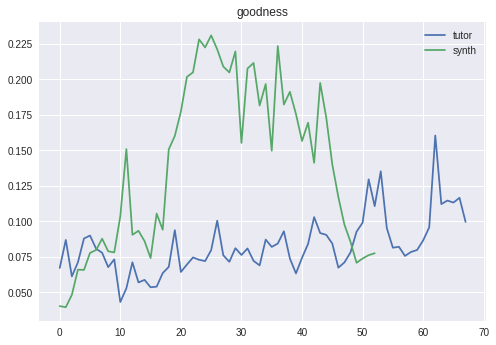

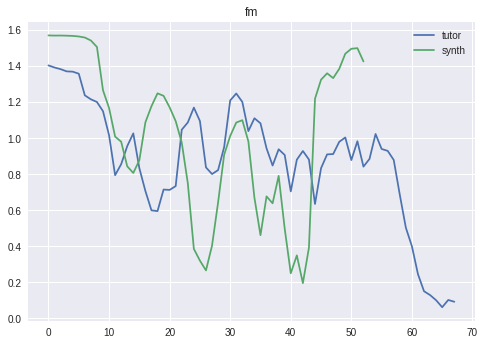

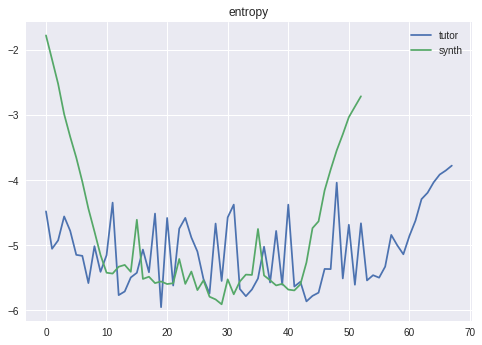

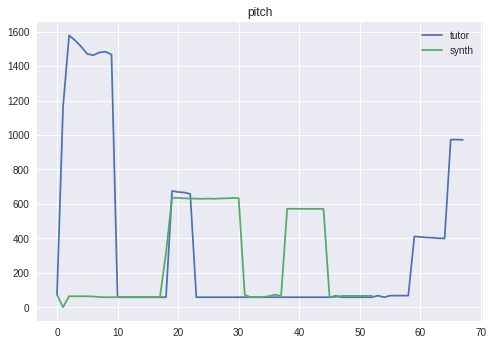

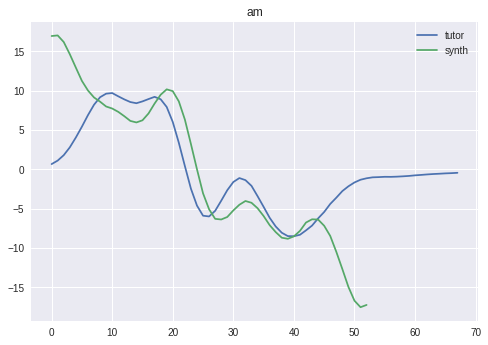

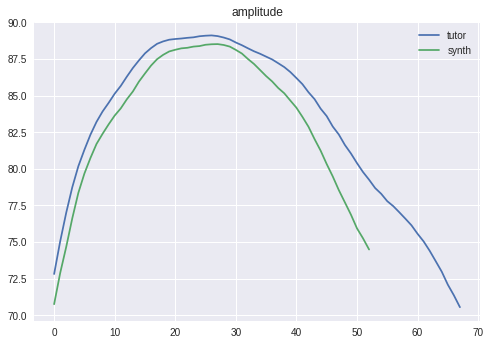

In [25]:
for fname in tfeat:
    plt.figure()
    plt.plot(tfeat[fname], label='tutor')
    plt.plot(sfeat[fname], label='synth')
    plt.legend()
    plt.title(fname)
    plt.show()

In [26]:
for fname in tfeat:
    print("*"*40)
    print(fname)
    print('tutor: mean: {}, std: {}'.format(np.mean(tfeat[fname]), np.std(tfeat[fname])))
    print('synth: mean: {}, std: {}'.format(np.mean(sfeat[fname]), np.std(sfeat[fname])))

****************************************
goodness
tutor: mean: 0.08277116127385897, std: 0.020128045787640707
synth: mean: 0.13856577003580917, std: 0.05892240433053854
****************************************
fm
tutor: mean: 0.874377324438021, std: 0.33207463158177686
synth: mean: 1.0234701307290248, std: 0.4224684763347523
****************************************
entropy
tutor: mean: -5.072463286264673, std: 0.559479268982623
synth: mean: -4.7982199239664345, std: 1.097345146003872
****************************************
pitch
tutor: mean: 351.66726914574116, std: 495.8617730611379
synth: mean: 262.01492813398255, std: 262.8643744766539
****************************************
am
tutor: mean: 0.006229975162982067, std: 5.40586546096427
synth: mean: -0.03371321831905599, std: 9.523957813248803
****************************************
amplitude
tutor: mean: 83.00650835255382, std: 5.559974002635825
synth: mean: 83.44953706691452, std: 4.805938417390134
